In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
basedir = '_run_output'
dir1 = 'couple_prob'#sorted(os.listdir(basedir))[0]
probs = sorted(os.listdir(os.path.join(basedir, dir1)))
#dflist = []
df = None
for prd in probs:
    sdirs = sorted(os.listdir(os.path.join(basedir, dir1, prd)))
    #df = None
    prob = prd.replace(dir1+'_', '')
    for sd in sdirs:
        #fs = sorted(os.listdir(os.path.join(basedir, dir1, prd, sd)))
        #print(fs)
        seed = sd.split('_')[2]
        f = 'yearly_summary.csv'
        fp = os.path.join(basedir, dir1, prd, sd, f)
        df_temp = pd.read_csv(fp, index_col=0)
        df_temp['prob'] = prob
        df_temp['seed'] = seed
        #print(df_temp.head())
        if df is None:
            df = df_temp
        else:
            df = df.append(df_temp)
        #break
    #dflist.append(df)
    print('done', prob)
    #break

done 0.0
done 0.1
done 0.2
done 0.3
done 0.4
done 0.5
done 0.6
done 0.7
done 0.8
done 0.9
done 1.0


In [4]:
df.head()

,years,days,no_individuals,no_births,no_deaths,no_immigrants,prob,seed
ind,,,,,,,,
0,0,0,16285,46,130,0,0.0,s152745
1,1,365,16195,55,145,0,0.0,s152745
2,2,730,16113,53,135,0,0.0,s152745
3,3,1095,16030,59,142,0,0.0,s152745
4,4,1460,15921,45,154,0,0.0,s152745


In [5]:
sorted(list(set(df.prob.tolist())))

['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

In [6]:
df.columns

Index(['years', 'days', 'no_individuals', 'no_births', 'no_deaths',
       'no_immigrants', 'prob', 'seed'],
      dtype='object')

In [10]:
skip = ['years', 'seed']
for col in df.columns.tolist():
    if col not in skip:
        df[col] = pd.to_numeric(df[col])

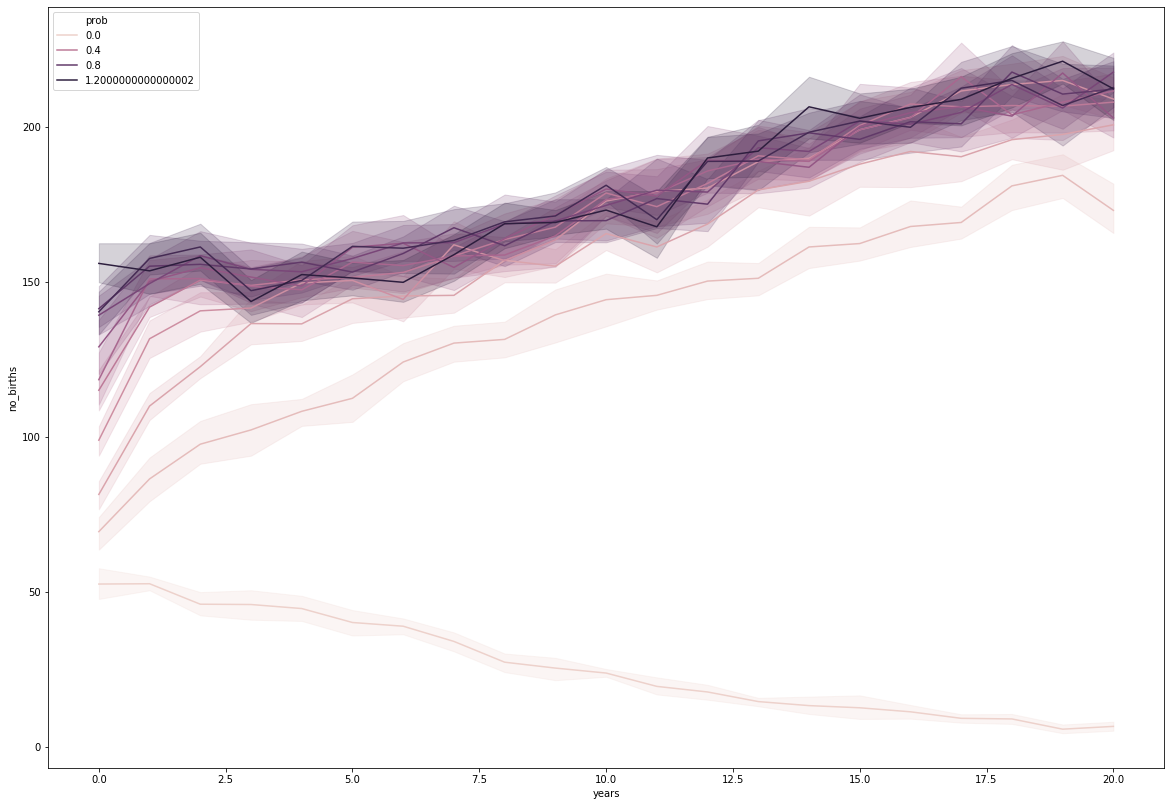

In [12]:
fig, ax = plt.subplots(figsize=(20,14))
sns.lineplot(x='years', y='no_births', hue='prob', data=df, ax=ax)

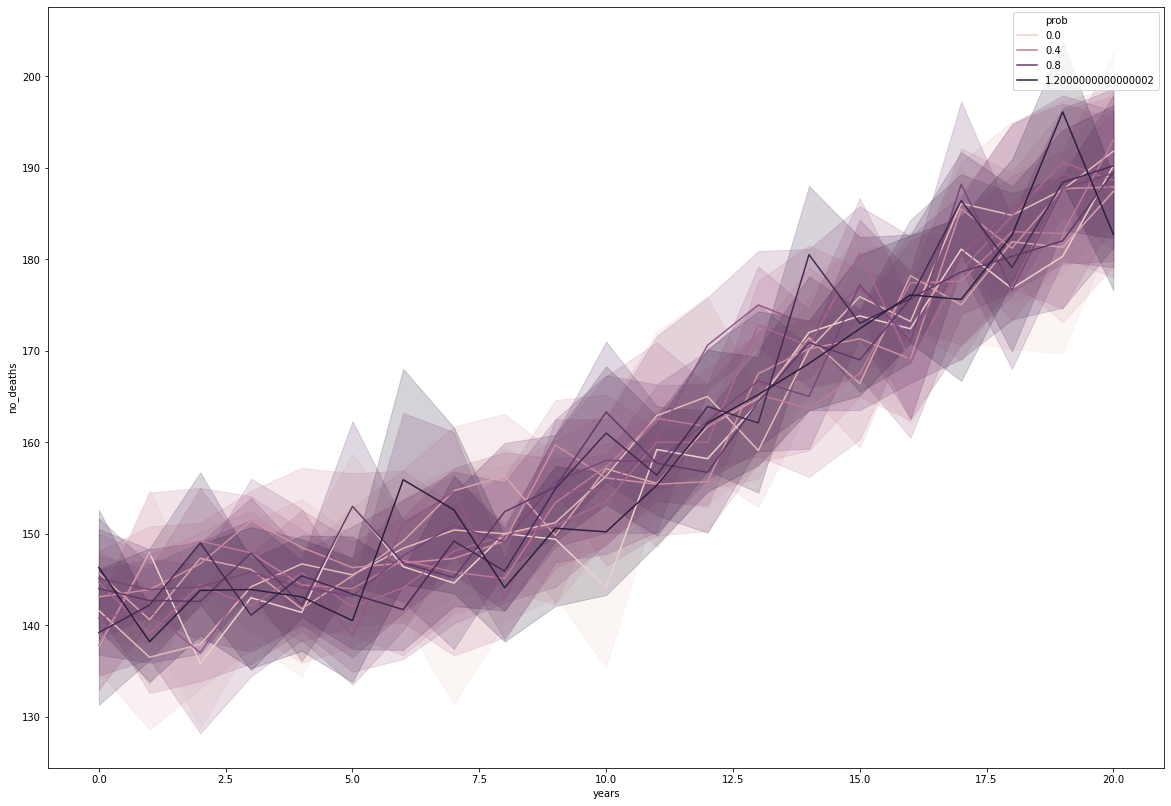

In [13]:
fig, ax = plt.subplots(figsize=(20,14))
sns.lineplot(x='years', y='no_deaths', hue='prob', data=df, ax=ax)

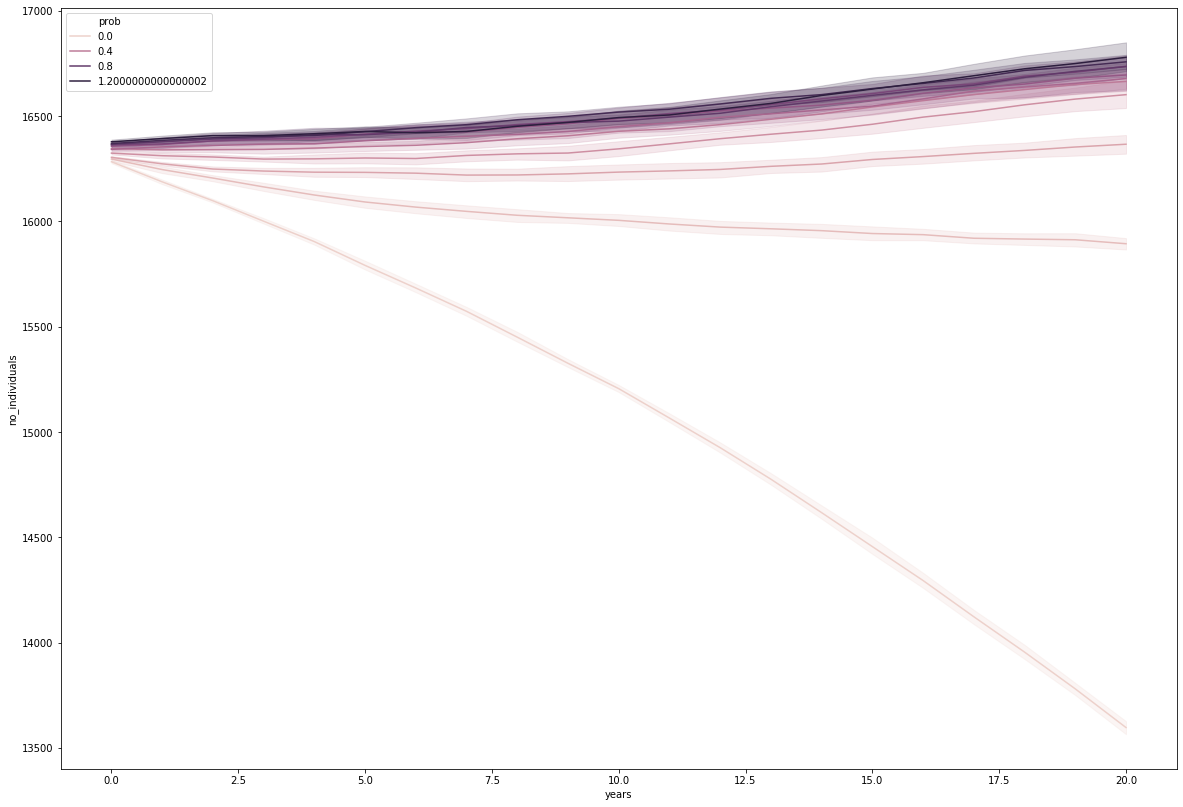

In [14]:
fig, ax = plt.subplots(figsize=(20,14))
sns.lineplot(x='years', y='no_individuals', hue='prob', data=df, ax=ax)